In [1]:
import os
import re
import shutil

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from tifffile import imsave

from suite2p import run_s2p, default_ops

from image_arrays import *
from s2p_runner import *

from scipy.signal import welch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# interactive plotting (outside or within notebook)
# %matplotlib qt
%matplotlib notebook

In [2]:
base_path = "/mnt/Data/prerna_noise/second_batch/"
originals = base_path + "originals/"

In [3]:
pth = originals
fnames = [
    f for f in os.listdir(pth) 
    if (f.endswith(".tiff") or f.endswith(".tif"))
]
stacks = {
    i: io.imread(os.path.join(pth, f)) 
    for i, f in enumerate(fnames)
}

print("files:")
for f in fnames:
    print("  %s" % f)

files:
  scan14_00051_DD_ch1_400um.tif
  scan14_00051_PD_ch1_400um.tif
  scan14_00055_DD_ch1_200um.tif
  scan14_00055_PD_ch1_200um.tif
  scan9_00035_DD_ch1_400um.tif
  scan9_00035_PD_ch1_400um.tif
  scan9_00040_DD_ch1_200um.tif
  scan9_00040_PD_ch1_200um.tif


<IPython.core.display.Javascript object>


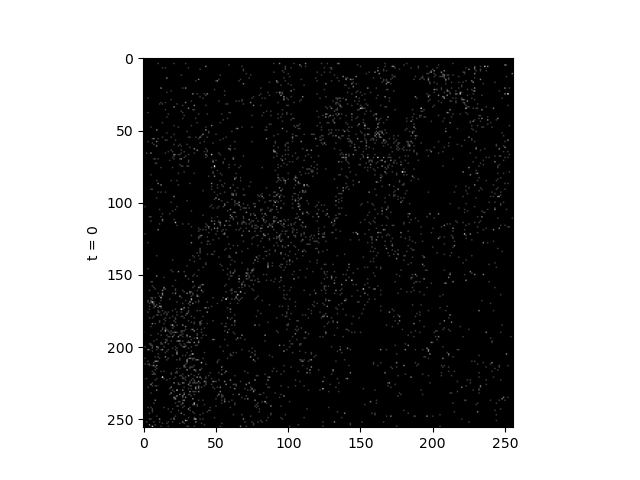

In [4]:
ex_stack_fig, ex_stack_ax = plt.subplots(1)
stack = StackPlotter(ex_stack_ax, stacks[6])
stack.connect_scroll(ex_stack_fig)

In [5]:
scan = "scan9_00040_PD_ch1_200um"
pth = base_path + scan + "/"
ops = bipolar_ops()
db = {"data_path": [pth]}
out_ops = run_s2p(ops, db)
s2p_pth = os.path.join(pth, "suite2p", "plane0")
recs, neu, stats = get_suite2p_data(s2p_pth, exclude_non_cells=False)

{'data_path': ['/mnt/Data/prerna_noise/second_batch/scan9_00040_PD_ch1_200um/']}
FOUND BINARIES AND OPS IN ['/mnt/Data/prerna_noise/second_batch/scan9_00040_PD_ch1_200um/suite2p/plane0/ops.npy']
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not running registration, plane already registered
NOTE: applying default /home/geoff/.suite2p/classifiers/classifier_user.npy
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie [150,248,254], 0.54 sec.
ROIs: 200, cost: 0.5067, time: 2.6831
ROIs: 334, cost: 0.4896, time: 4.7375
ROIs: 373, cost: 0.4845, time: 5.7841
ROIs: 377, cost: 0.4834, time: 6.4569
ROIs: 377, cost: 0.5434, time: 6.7340
ROIs: 377, cost: 0.5348, time: 8.1528
ROIs: 377, cost: 0.5308, time: 9.0868
Found 377 ROIs, 12.74 sec
After removing overlaps, 372 ROIs remain
Masks made in 8.20 sec.
----------- Total 21.68 sec.
----------- EXTRACTION
Extracted fluorescence from 372 ROIs in 1700 frames, 1.35 sec.
added enhanced mean image
----------- Total 2.

In [6]:
dims = stacks[0].shape  # all the same
masks = create_masks(stats, dims[1:])

In [7]:
rec_movie = roi_movie(recs, stats, dims)

<IPython.core.display.Javascript object>


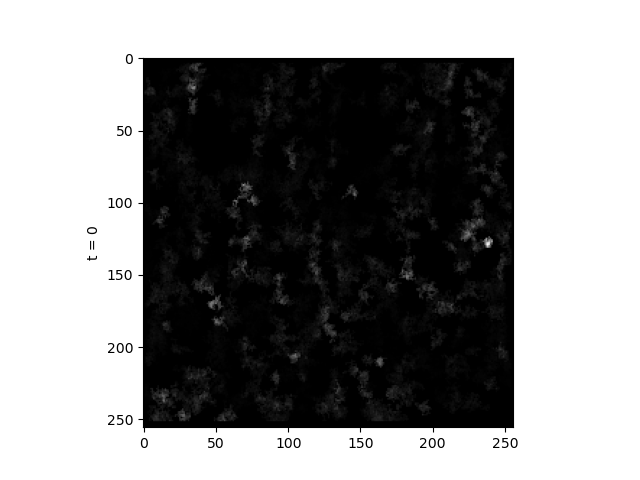

In [8]:
rec_fig, rec_ax = plt.subplots(1)
rec_stack = StackPlotter(rec_ax, rec_movie)
rec_stack.connect_scroll(rec_fig)

In [9]:
fs, spec = welch(recs, 1)

<IPython.core.display.Javascript object>


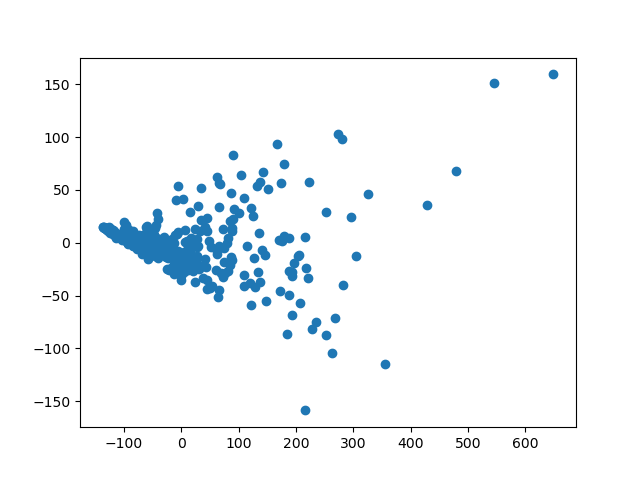

In [10]:
pca = PCA()
pca_spec_fig, pca_spec_ax = plt.subplots(1)
reduced_spec = pca.fit_transform(spec)
pca_spec_ax.scatter(reduced_spec[:, 0], reduced_spec[:, 1])

<IPython.core.display.Javascript object>


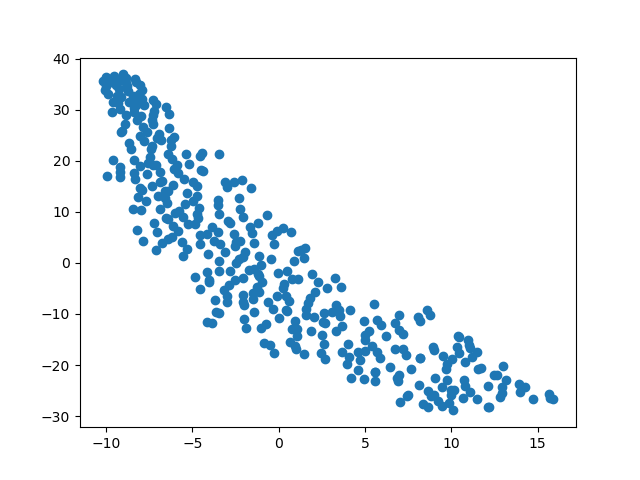

In [11]:
tsne_spec_fig, tsne_spec_ax = plt.subplots(1)
embed = TSNE(
    n_components=2, perplexity=30).fit_transform(spec)
tsne_spec_ax.scatter(embed[:, 0], embed[:, 1])

<IPython.core.display.Javascript object>


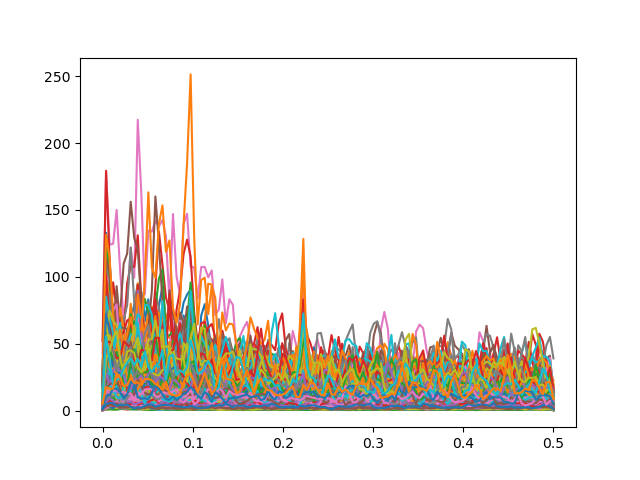

In [17]:
spec_fig, spec_ax = plt.subplots(1)
for s in spec:
    spec_ax.plot(fs, s)

<IPython.core.display.Javascript object>


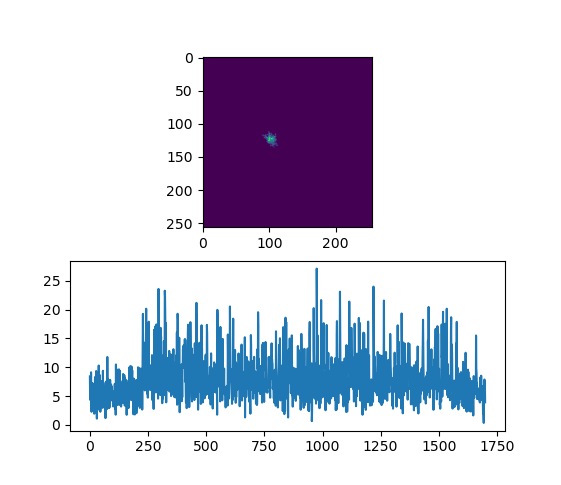

In [21]:
i = 0
mask_fig, mask_ax = plt.subplots(2)
mask_ax[0].imshow(masks[i])
mask_ax[1].plot(recs[i] - neu[i] * 0.7)